In [96]:
library(MASS) # MASS 라이브러리 
library(tidyverse) # tidyverse 라이브러리 
library(ggplot2) # ggplot2 라이브러리 
library(dplyr) # dplyr 라이브러리
library(ggmosaic) # ggplot에 이용할 수 있는 모자이크 라이브러리
library(corrplot) # 상관분석 도표를 표현할 때 쓰는 플롯 라이브러리

Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded



In [9]:
crime <- as.data.frame(MASS::UScrime) # 데이터셋을 데이터프레임으로 crime변수에 할당

# 데이터 확인 
head(crime) # 데이터 상위 6개 데이터 
summary(crime) # 요약통계량
dim(crime) # 데이터 차원 
str(crime) # 데이터의 속성구조 
table(is.na(crime)) # 결측치 개수 확인
"
uscrime 데이터 
: 처벌정책이 범죄율에 미치는 영향 연구(미국 47개 주의 데이터)
M = 14-24살 남성인구 비율
So = 남부 주에 대한 지시변수
Ed = 평균 교육기간
Po1 = 1960년 경찰 유지비용
Po2 = 1959년 경찰 유지비용
LF = 고용률
M.F = 여성 1000명당 남성 비율
Pop = 주 인구수(단위 1000명)
NW = 인구 1000명당 비백인수
U1 = 14-24세 도시 남성 실업률
U2 = 35-39세 도시 남성 실업률 
GDP = 1인당 주내 총생산량
Ineq = 소득 불평등 지수
Prob = 구속 확률
Time = 재소자의 재소기간의 평균
y = 특정 유형에 대한 범죄율
출처: http://datamining.dongguk.ac.kr/lectures/basic_stat/_book/index.html"

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234
6,121,0,110,118,115,547,964,25,44,84,29,689,126,0.034201,20.9995,682


       M               So               Ed             Po1       
 Min.   :119.0   Min.   :0.0000   Min.   : 87.0   Min.   : 45.0  
 1st Qu.:130.0   1st Qu.:0.0000   1st Qu.: 97.5   1st Qu.: 62.5  
 Median :136.0   Median :0.0000   Median :108.0   Median : 78.0  
 Mean   :138.6   Mean   :0.3404   Mean   :105.6   Mean   : 85.0  
 3rd Qu.:146.0   3rd Qu.:1.0000   3rd Qu.:114.5   3rd Qu.:104.5  
 Max.   :177.0   Max.   :1.0000   Max.   :122.0   Max.   :166.0  
      Po2               LF             M.F              Pop        
 Min.   : 41.00   Min.   :480.0   Min.   : 934.0   Min.   :  3.00  
 1st Qu.: 58.50   1st Qu.:530.5   1st Qu.: 964.5   1st Qu.: 10.00  
 Median : 73.00   Median :560.0   Median : 977.0   Median : 25.00  
 Mean   : 80.23   Mean   :561.2   Mean   : 983.0   Mean   : 36.62  
 3rd Qu.: 97.00   3rd Qu.:593.0   3rd Qu.: 992.0   3rd Qu.: 41.50  
 Max.   :157.00   Max.   :641.0   Max.   :1071.0   Max.   :168.00  
       NW              U1               U2             GDP    

[1] 47 16

'data.frame':	47 obs. of  16 variables:
 $ M   : int  151 143 142 136 141 121 127 131 157 140 ...
 $ So  : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed  : int  91 113 89 121 121 110 111 109 90 118 ...
 $ Po1 : int  58 103 45 149 109 118 82 115 65 71 ...
 $ Po2 : int  56 95 44 141 101 115 79 109 62 68 ...
 $ LF  : int  510 583 533 577 591 547 519 542 553 632 ...
 $ M.F : int  950 1012 969 994 985 964 982 969 955 1029 ...
 $ Pop : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW  : int  301 102 219 80 30 44 139 179 286 15 ...
 $ U1  : int  108 96 94 102 91 84 97 79 81 100 ...
 $ U2  : int  41 36 33 39 20 29 38 35 28 24 ...
 $ GDP : int  394 557 318 673 578 689 620 472 421 526 ...
 $ Ineq: int  261 194 250 167 174 126 168 206 239 174 ...
 $ Prob: num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time: num  26.2 25.3 24.3 29.9 21.3 ...
 $ y   : int  791 1635 578 1969 1234 682 963 1555 856 705 ...



FALSE 
  752 

[1] "\nuscrime 데이터 \n: 처벌정책이 범죄율에 미치는 영향 연구(미국 47개 주의 데이터)\nM = 14-24살 남성인구 비율\nSo = 남부 주에 대한 지시변수\nEd = 평균 교육기간\nPo1 = 1960년 경찰 유지비용\nPo2 = 1959년 경찰 유지비용\nLF = 고용률\nM.F = 여성 1000명당 남성 비율\nPop = 주 인구수(단위 1000명)\nNW = 인구 1000명당 비백인수\nU1 = 14-24세 도시 남성 실업률\nU2 = 35-39세 도시 남성 실업률 \nGDP = 1인당 주내 총생산량\nIneq = 소득 불평등 지수\nProb = 구속 확률\nTime = 재소자의 재소기간의 평균\ny = 특정 유형에 대한 범죄율\n출처: http://datamining.dongguk.ac.kr/lectures/basic_stat/_book/index.html"

 Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 2 2 1 ...


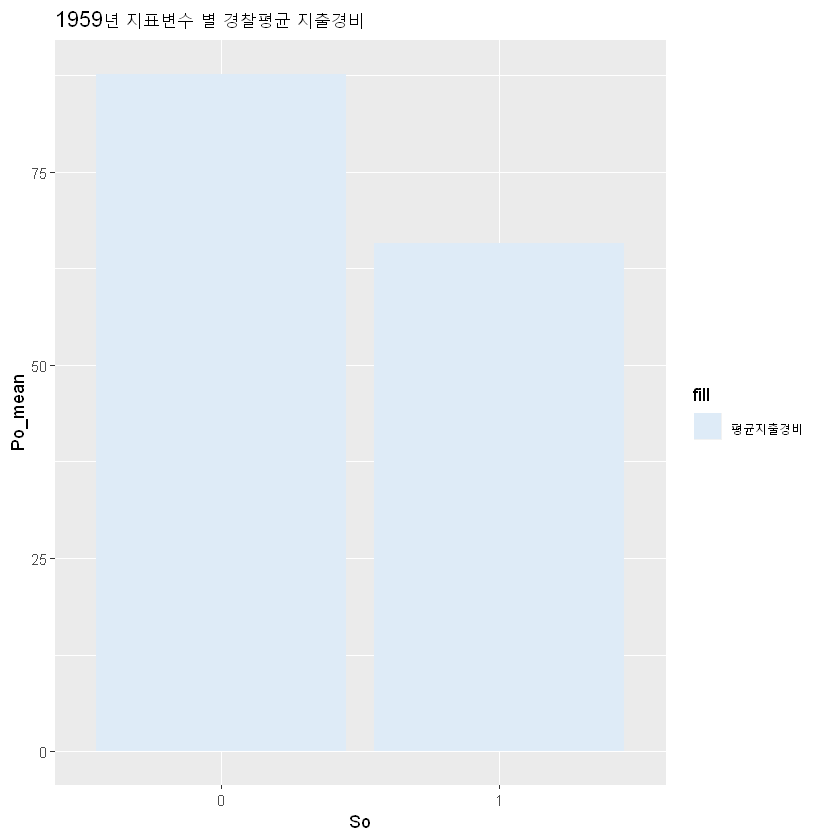

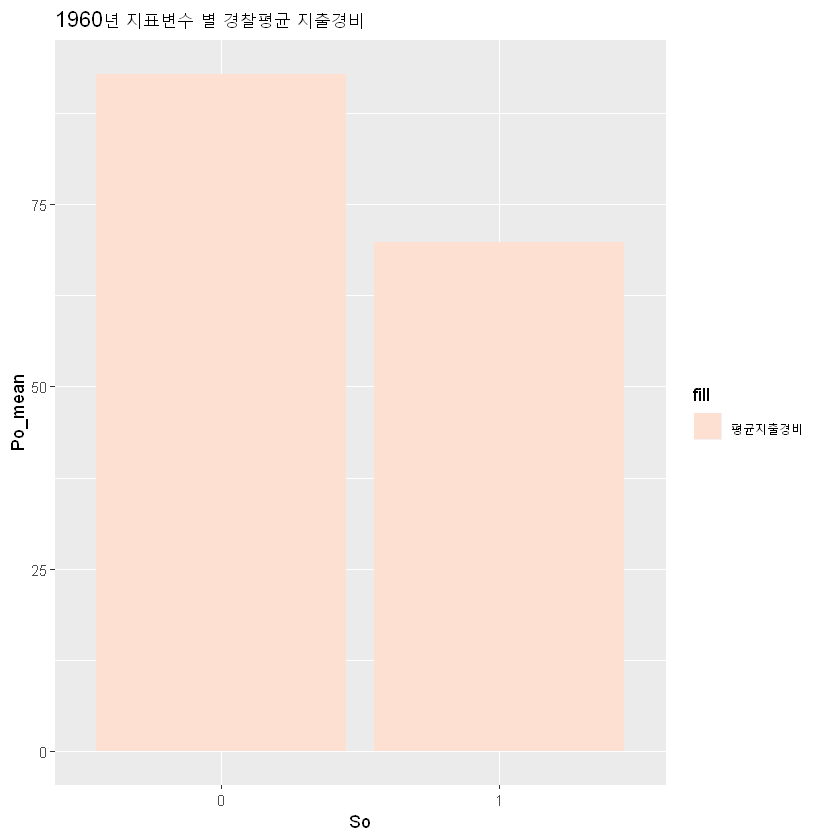

In [72]:
# 주 지표변수에 따른 1959년, 1960년 경찰 평균 경비지출 비교 
crime$So <- as.factor(crime$So) # So는 지표변수로 범주형으로 변환
str(crime$So) # 범주형으로 변환 되었는지 확인
po59 <- crime %>% # 1959년 지표변수에 따른 경찰 평균 경비지출
            group_by(So)  %>% 
            summarise(Po_mean = mean(Po2))
po60 <- crime %>% # 1959년 지표변수에 따른 경찰 평균 경비지출
            group_by(So)  %>% 
            summarise(Po_mean = mean(Po1))
ggplot(data=po59, aes(x= So, y=Po_mean, fill="평균지출경비")) +
            geom_col(position="stack") + 
            ggtitle("1959년 지표변수 별 경찰평균 지출경비") +
            scale_fill_brewer(palette = "Blues")
ggplot(data=po60, aes(x= So, y=Po_mean, fill="평균지출경비")) +
            geom_col(position="stack") +
            ggtitle("1960년 지표변수 별 경찰평균 지출경비") +
            scale_fill_brewer(palette = "Reds")

   U1_class
So  High Low Mean
  0    9  14    8
  1    3  11    2

   U2_class
So  High Low Mean
  0    8  14    9
  1    4   7    5

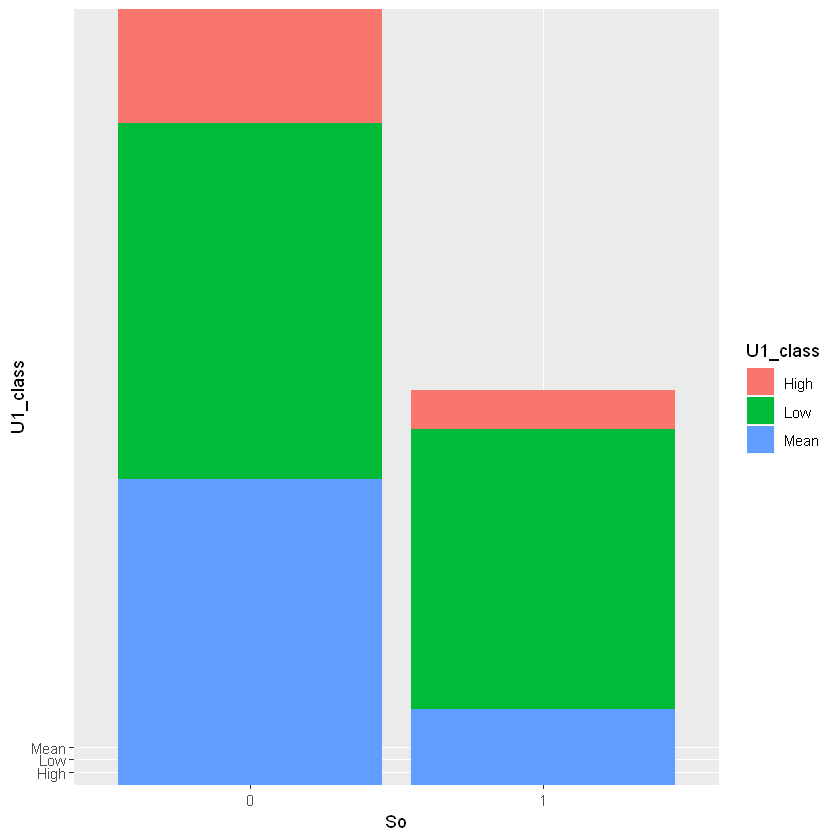

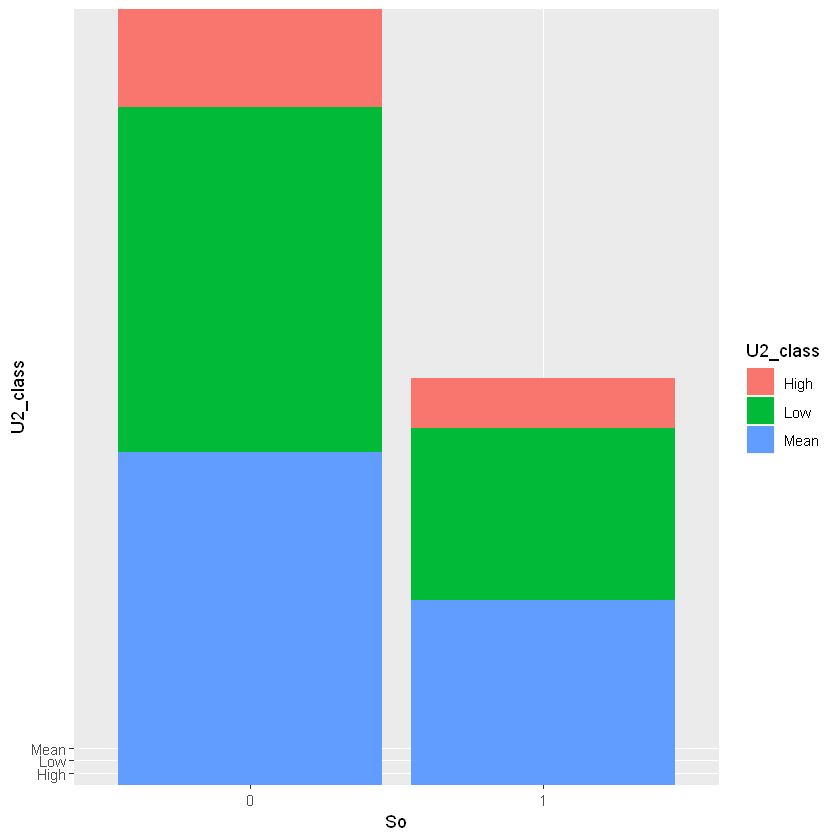

In [149]:
# 14-24, 35-39
Young <- crime  %>% 
             mutate(U1_class= ifelse(U1>=104.00, "High",
                                    ifelse(U1>=95.47, "Mean", "Low")))  %>%
            select(So, U1_class)  %>% 
            group_by(So)
Old <- crime %>%  
             mutate(U2_class = ifelse(U2>=38.50, "High",
                                    ifelse(U2>=33.98, "Mean", "Low"))) %>% 
            select(So, U2_class) %>% 
            group_by(So)    

table(Young)
table(Old)
ggplot(Young, aes(x=So, y=U1_class, fill=U1_class)) + 
        geom_col()
ggplot(Old, aes(x=So, y=U2_class, fill=U2_class)) + 
        geom_col()

   p_class
So  High Low Mean
  0    3  25    3
  1    9   4    3

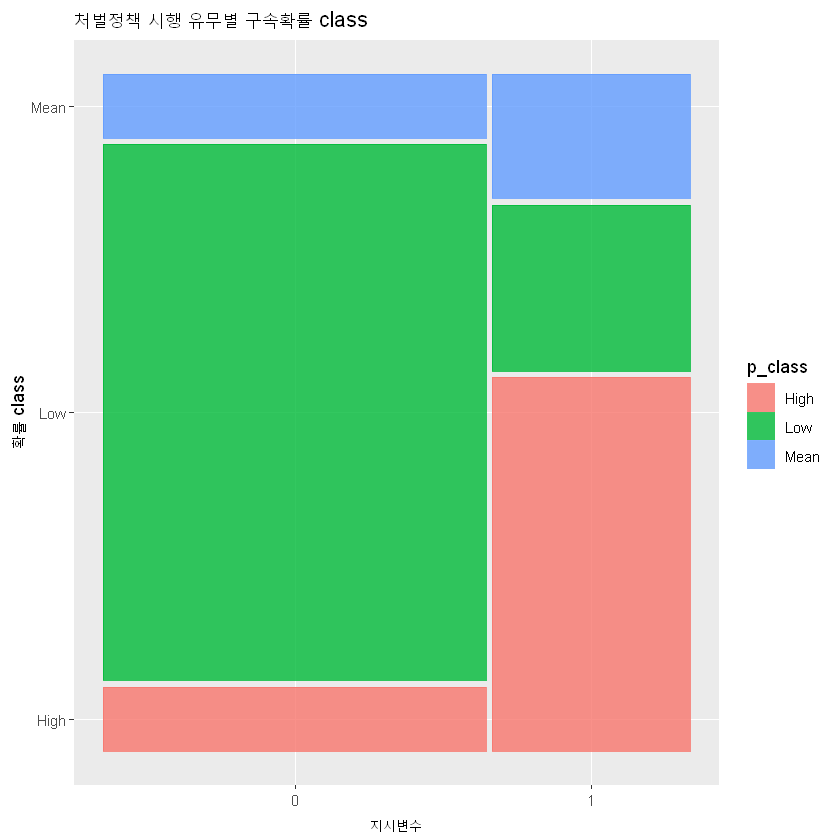

In [121]:
# 처벌정책에 따른 구속확률 

so_pro <- crime  %>%
            mutate(p_class = ifelse(Prob>=0.05445, "High",
                                   ifelse(Prob>=0.04709, "Mean", "Low")))  %>%
            select(So, p_class)  %>% 
            group_by(So)
table(so_pro)
ggplot(data = so_pro) +
        geom_mosaic(aes(x=product(p_class, So), fill=p_class)) + 
        labs(x="지시변수", y="확률 class", title="처벌정책 시행 유무별 구속확률 class")
        

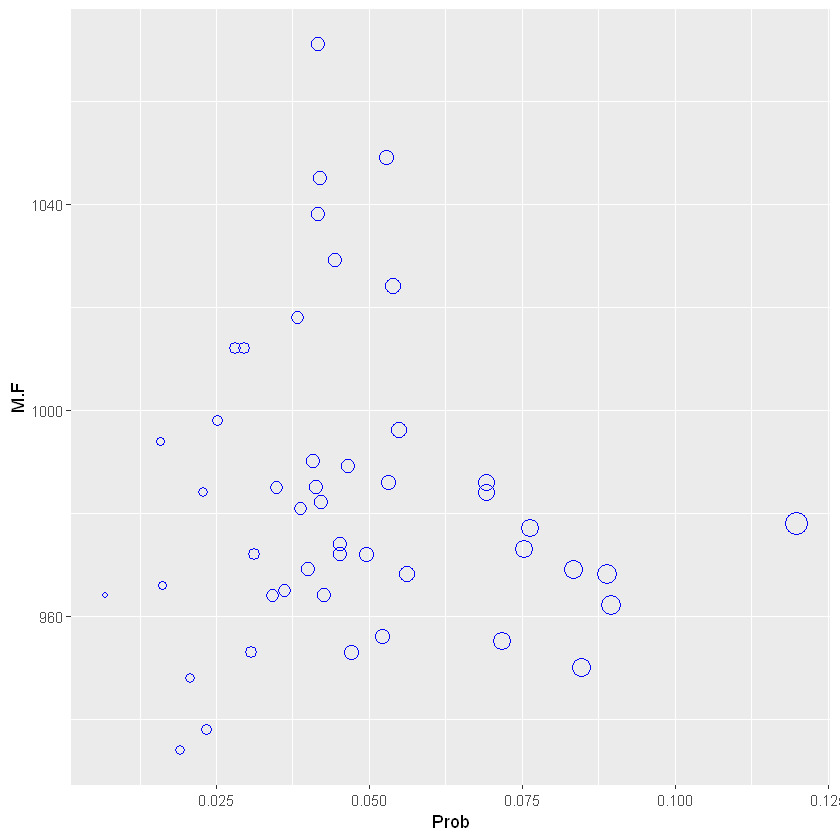

In [84]:
# 지시변수와 특정범죄비율, 여성비율에 대한 버블차트 
so_p_m <- crime  %>% 
            select(So, Prob, M.F)
ggplot(so_p_m, aes(x=Prob, y=M.F)) + 
        geom_point(aes(size=Prob), shape=21, colour="blue") +
        scale_size_area(guide = FALSE)

,Ineq,GDP,LF,Prob,y,Time
,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,261,394,510,0.084602,791,26.2011
2,194,557,583,0.029599,1635,25.2999
3,250,318,533,0.083401,578,24.3006
4,167,673,577,0.015801,1969,29.9012
5,174,578,591,0.041399,1234,21.2998
6,126,689,547,0.034201,682,20.9995


,Ineq,GDP,LF,Prob,y,Time
Ineq,1.0000000,-0.8839972758,-0.2698865,0.4653219,-0.1790237,0.1018228182
GDP,-0.8839973,1.0000000000,0.2946323,-0.5553347,0.4413199,0.0006485587
LF,-0.2698865,0.2946323090,1.0000000,-0.2500861,0.1888663,-0.1236404364
Prob,0.4653219,-0.5553347075,-0.2500861,1.0000000,-0.4274222,-0.4362462614
y,-0.1790237,0.4413199490,0.1888663,-0.4274222,1.0000000,0.1498660617
Time,0.1018228,0.0006485587,-0.1236404,-0.4362463,0.1498661,1.0000000000


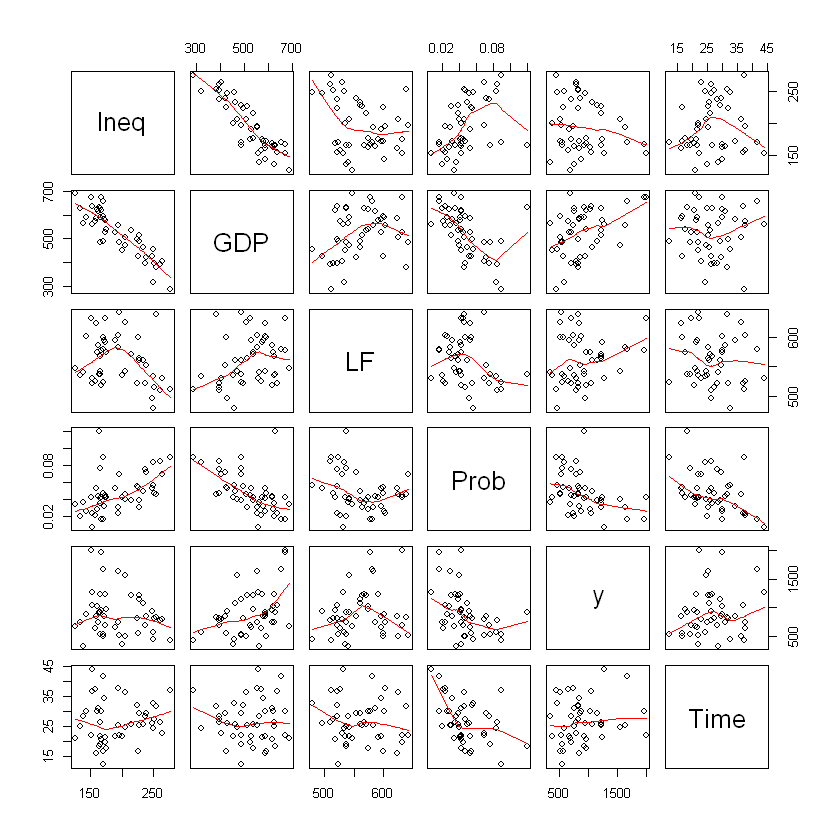

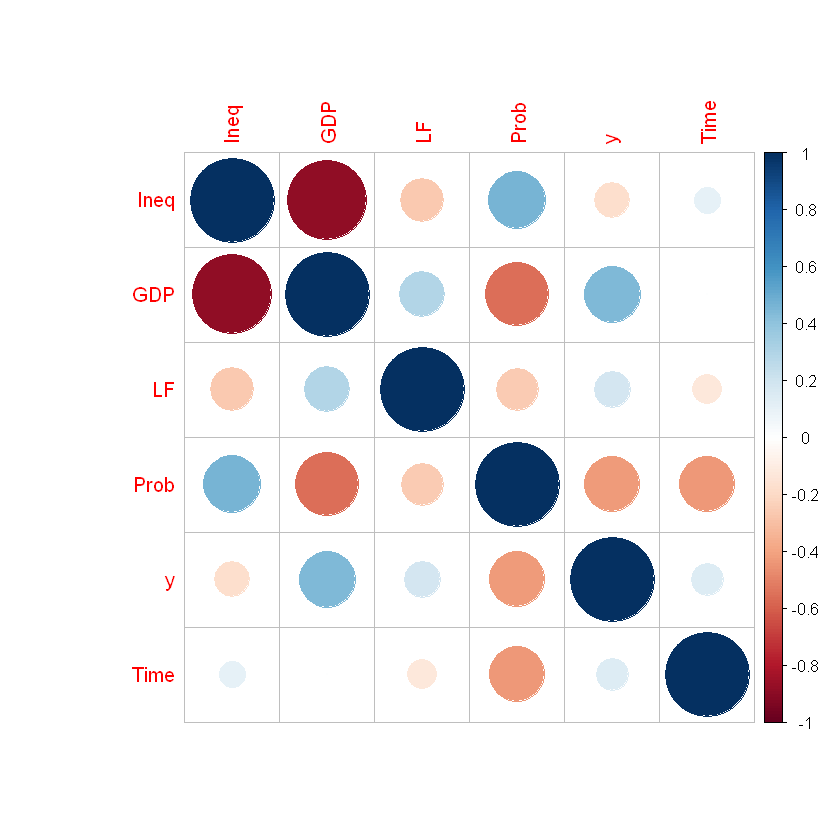

In [97]:
# 소득불평등지수, 총생산량, 고용률,구속확률, 특정유형, 재소기간에 대한 범죄율 산점도와 상관관계 
eco_crime <- crime  %>% 
                select(Ineq, GDP, LF, Prob, y, Time)
head(eco_crime)
pairs(eco_crime, panel=panel.smooth)
cor_eco_crime<-cor(eco_crime)
cor_eco_crime
corrplot(cor_eco_crime)